In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple

In [3]:
def __random_fn_def__():
    def __random_fn__(samples):
        return np.zeros((samples,))
    
    return __random_fn__
    
__random_fn__ = __random_fn_def__()

# Práctica 1: Introducción a Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

- generate_white_noise &#x1F625;
- smooth_time_series &#x1F921;
- generate_random_walk_drift &#x1F625;
- generate_signal_noise &#x1F625;
- Ajuste de curva &#x1F643;

__Notas:__
- No está permitido el uso de ninguna paquetería adicional a las importadas en este cuaderno.
- Puede agregar más celdas en caso de que así lo requiera.
- Los únicos espacios permitidos para codificar serán aquellos marcados por _#CÓDIGO AQUI_ y las celdas que usted agregue. __NO MODIFIQUE NINGUNA OTRA CELDA__.

In [4]:
def generate_white_noise(
    n_times: int,
    mean: float=0., 
    std: float=1.
) -> np.array:
    """
    Descripción:
    Esta funcion genera una secuencia de ruido blanco de longitud n_times
    
    Entradas:
    - n_times: Longitud de la serie de tiempo a generar
    - mean: Media a utilizar como parámetro de la distribución
    - std: Desviación estándar a utilizar como parámetro de la distribución
            
    Salidas:
    - Un arreglo de numpy conteniendo el ruido blanco
    """
    
    time_series = __random_fn__(n_times)
    
    # CÓDIGO AQUÍ
    
    for i in range(n_times):
        time_series[i] = np.random.normal(mean, std)
    
    return time_series

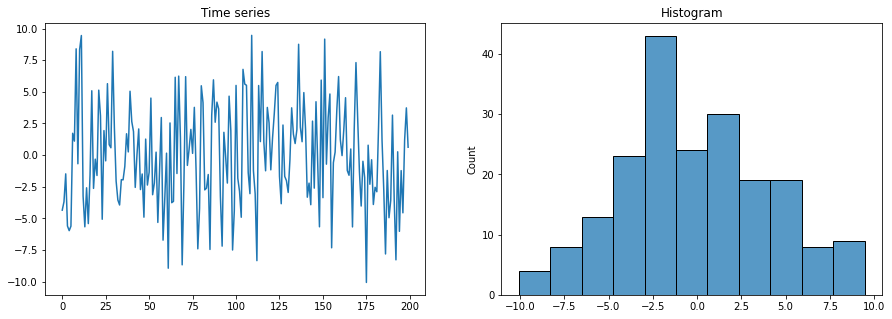

In [5]:
__n_times__ = 200
__times__ = np.arange(__n_times__)

__white_noise__ = generate_white_noise(
    n_times=__n_times__, 
    mean=0, 
    std=4.
)

assert __white_noise__.shape == (__n_times__, )

__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__axs__[0].set(title="Time series")
__axs__[1].set(title="Histogram")
_ = sns.lineplot(x=__times__, y=__white_noise__, ax=__axs__[0])
_ = sns.histplot(x=__white_noise__, ax=__axs__[1])

In [6]:
def smooth_time_series(
    time_series: np.array,
    mask_size: int=2
) -> np.array:
    """
    Descripción:
    Esta funcion suaviza una serie de tiempo utilizando medias móviles.
    
    Entradas:
    - time_series: Serie de tiempo a suavizar
    - mask_size: Número de datos (por lado) a promediar
            
    Salidas:
    - Un arreglo de numpy conteniendo la serie de tiempo suavizada. 
         Los valores enlos extremos deben ser los mismos que la serie de tiempo original.
    """
    
    smooth_time_series = __random_fn__(time_series.shape[0])
    
    # CÓDIGO AQUÍ
    
    for i in range(time_series.shape[0]):
        indexes_mov_avg = [j for j in range(-mask_size + i, mask_size + i + 1) if j >= 0 and j < time_series.shape[0]]
        smooth_time_series[i] = sum(time_series[indexes_mov_avg]) / len(indexes_mov_avg)
    
    return smooth_time_series

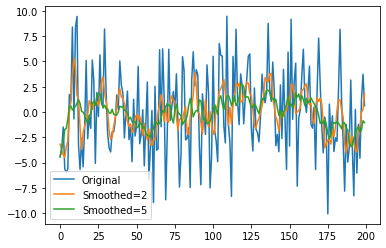

In [7]:
_ = sns.lineplot(x=__times__, y=__white_noise__, label="Original")
_ = sns.lineplot(x=__times__, y=smooth_time_series(__white_noise__), label="Smoothed=2")
_ = sns.lineplot(x=__times__, y=smooth_time_series(__white_noise__, mask_size=5), label="Smoothed=5")

In [8]:
def generate_random_walk_drift(
    n_times: int,
    drift: float=1.,
    white_noise: np.array=None
) -> np.array:
    """
    Descripción:
    Esta funcion genera una serie de tiempo utilizando una caminata aleatoria con pendiente
    
    Entradas:
    - n_times: Longitud de la serie de tiempo a generar
    - drift: Valor del drift utilizado en el modelo
    - white_noise: Si el valor es None no se agregará ruido blanco, en caso contrario será
        una serie de tiempo de tamaño n_times
            
    Salidas:
    - Un arreglo de numpy conteniendo la serie de tiempo.
    """
    if white_noise is not None:
        assert white_noise.shape == (n_times,)
        
    time_series = __random_fn__(n_times)
    
    # CÓDIGO AQUÍ
    
    if white_noise is None:
        for i in range(n_times):
            time_series[i] = drift * i
    else:
        for i in range(n_times):
            time_series[i] = drift * i + np.sum(white_noise[:i])
    
    return time_series

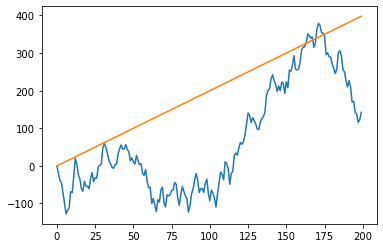

In [9]:
__random_walk_drift__ = generate_random_walk_drift(
    n_times=__n_times__, 
    drift=1, 
    white_noise=__white_noise__ * 5
)

__random_walk_drift_clean__ = generate_random_walk_drift(
    n_times=__n_times__, 
    drift=2, 
    white_noise=None
)

assert __random_walk_drift__.shape == (__n_times__, )
assert __random_walk_drift_clean__.shape == (__n_times__, )

_ = sns.lineplot(x=__times__, y=__random_walk_drift__)
_ = sns.lineplot(x=__times__, y=__random_walk_drift_clean__)

In [10]:
def generate_signal_noise(
    n_times: int,
    amplitude: float=1.,
    frequency: float=1.,
    phase: float=0.,
    white_noise: np.array=None
) -> np.array:
    """
    Descripción:
    Esta funcion genera una serie de tiempo utilizando el modelo de señal en ruido
    
    Entradas:
    - n_times: Longitud de la serie de tiempo a generar
    - amplitude: Valor de la amplitud de la señal
    - frequency: Valor de la frecuencia
    - phase: Valor de la fase
    - white_noise: Si el valor es None no se agregará ruido blanco, en caso contrario será
        una serie de tiempo de tamaño n_times
            
    Salidas:
    - Un arreglo de numpy conteniendo la serie de tiempo.
    """
    if white_noise is not None:
        assert white_noise.shape == (n_times,)
        
    time_series = __random_fn__(n_times)
    
    # CÓDIGO AQUÍ
    
    for i in range(n_times):
        time_series[i] = 2 * np.pi * frequency * i + phase
    time_series = amplitude * np.cos(time_series)    
        
    if white_noise is not None:
        time_series = time_series + white_noise
    
    return time_series

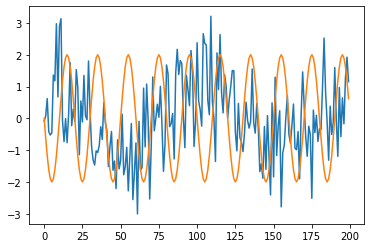

In [11]:
__signal_noise__ = generate_signal_noise(
    n_times=__n_times__, 
    amplitude=1.,
    frequency=0.01,
    phase=0,
    white_noise=__white_noise__ / 4
)

__signal_noise_clean__ = generate_signal_noise(
    n_times=__n_times__, 
    amplitude=2.,
    frequency=0.05,
    phase=np.pi / 2,
    white_noise=None
)

assert __signal_noise__.shape == (__n_times__, )
assert __signal_noise_clean__.shape == (__n_times__, )

_ = sns.lineplot(x=__times__, y=__signal_noise__)
_ = sns.lineplot(x=__times__, y=__signal_noise_clean__)

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Por ahora sólo nos centraremos enla serie de tiempo __meantemp__.

In [12]:
__df__ = pd.read_csv("DailyDelhiClimateTrain.csv")
__df__["date"] = pd.to_datetime(__df__["date"])
__df__.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [13]:
__df__["meantemp"] = __df__["meantemp"] - __df__["meantemp"].min()

In [32]:
"""
Ajuste los valores del drift, amplitud, frecuencia y fase hasta que obtenga un error menor a 10.
No cambie los nombres de las variables.
"""

# CÓDIGO AQUÍ
#__ts_drift__ = 0.020
__ts_drift__ = 0.0025
__ts_amplitude__ = 28
__ts_frequency__ = 0.00136
__ts_phase__ = 1.6

Your error is 9.710619887798758


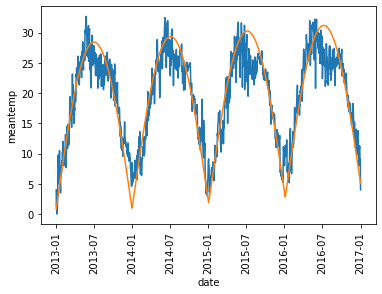

In [33]:
plt.xticks(rotation=90)

__ts_times__ = __df__.shape[0]

__ts_signal_noise__ = generate_signal_noise(
    n_times=__ts_times__,
    amplitude=__ts_amplitude__,
    frequency=__ts_frequency__,
    phase=__ts_phase__) 

__ts_random_walk_drift__ = generate_random_walk_drift(
    n_times=__ts_times__,
    drift=__ts_drift__
)

__ts_signal__ = np.abs(__ts_signal_noise__) + __ts_random_walk_drift__

__error__ = ((__df__["meantemp"].values - __ts_signal__) ** 2).mean()

print(f"Your error is {__error__}")

_ = sns.lineplot(data=__df__, x="date", y="meantemp")
_ = sns.lineplot(x=__df__["date"], y=__ts_signal__)

## Integrity Tests

In [16]:
import hashlib

cell_signs = [
    "3105b971120004344e3632f0aea1d1fc64c490e3",    
    "5057084db8b7a05a15ad18e9a52ec7e189df32a4",    
    "bfe73f723b931209e75b1900c5dfbddc42431030",    
    "c9be2e8d6bf73d558f1e9b413b991440b7a7c5d9",    
    "7f4a6e2288b056f34f3ba6e744bcc7baf3f60b71",    
    "0f6c1affc24bb68f0de7b3a305c5f133abc1b611",
    "aa1d6da548080919f80b2592930244a4f7060f45",
    "f9e0d6d32220f0cbfeac8be4d2d17cb5806afb85",
    "6bf90b6e570ab53646eebc07565e387eaba82e8d"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

In [17]:
content = _ih[-2]

program_sign = "aac3ded47d0985bb9f801ad1600cf0e7ec925a7c"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
